In [39]:
import numpy as np
from scipy.integrate import quad_vec
import matplotlib.pyplot as plt

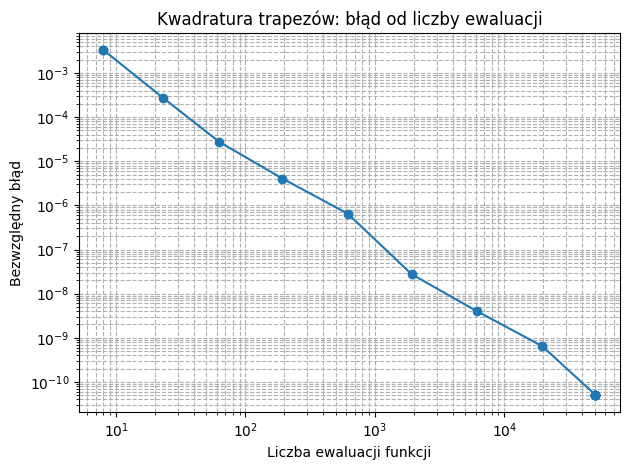

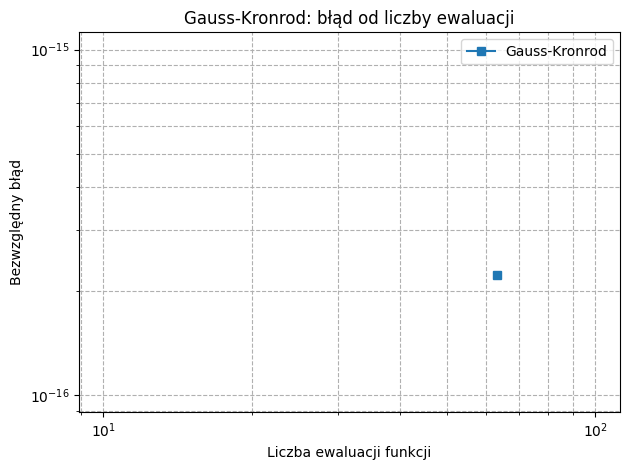

In [40]:
# Task 1
f = lambda x: 4/(1+x**2)

def task1(f=f, true_value=np.pi, do_print = True):
    tolerances = [10**k for k in range(0, -15, -1)]
    trapezoid_rel_errors = []
    gauss_kronrod_errors = []

    for tolerance in tolerances:
        trapezoid_quadrature_result = quad_vec(f, 0, 1, quadrature='trapezoid', epsrel=tolerance, full_output=True)
        gauss_kronrod_quadrature_result = quad_vec(f, 0, 1, quadrature='gk21', epsrel=tolerance, full_output=True)

        trapezoid_value, trapezoid_neval = trapezoid_quadrature_result[0], trapezoid_quadrature_result[2].neval
        gauss_kronrod_value, gauss_kronrod_neval = gauss_kronrod_quadrature_result[0], gauss_kronrod_quadrature_result[2].neval

        trapezoid_rel_errors.append((tolerance, abs((trapezoid_value - true_value) / true_value), trapezoid_neval))
        gauss_kronrod_errors.append((tolerance, abs((gauss_kronrod_value - true_value) / true_value), gauss_kronrod_neval))


    # Rozpakowanie wyników
    tols_t, errors_t, nevals_t = zip(*trapezoid_rel_errors)
    tols_g, errors_g, nevals_g = zip(*gauss_kronrod_errors)
    if do_print:
        # Wykres trapezów
        plt.figure()
        plt.loglog(nevals_t, errors_t, marker='o')
        plt.xlabel('Liczba ewaluacji funkcji')
        plt.ylabel('Bezwzględny błąd')
        plt.title('Kwadratura trapezów: błąd od liczby ewaluacji')
        plt.grid(which='both', ls='--')
        plt.tight_layout()
        plt.show()

    # Wykres Gauss–Kronrod
    nevals = np.array(nevals_g)
    errors = np.array(errors_g)

    # Filtrujemy punkty, gdzie błąd > 0 i ewaluacje > 0, inaczej nie moglibyśmy przedstawić ich na wykresie logarytmicznym
    mask = (nevals > 0) & (errors > 0)
    if not mask.any():
        nevals_g = np.array([nevals[0]])
        errors_g = np.array([np.finfo(float).eps])
    else:
        nevals_g = nevals[mask]
        errors_g = errors[mask]
        
    if do_print:
        plt.figure()
        plt.loglog(nevals_g, errors_g, marker='s', label='Gauss-Kronrod')
        plt.xlabel('Liczba ewaluacji funkcji')
        plt.ylabel('Bezwzględny błąd')
        plt.title('Gauss-Kronrod: błąd od liczby ewaluacji')
        plt.grid(which='both', ls='--')
        plt.legend()
        plt.tight_layout()
        plt.show()

    return nevals_t, errors_t, nevals_g, errors_g

nevals_t, errors_t, nevals_g, errors_g = task1()


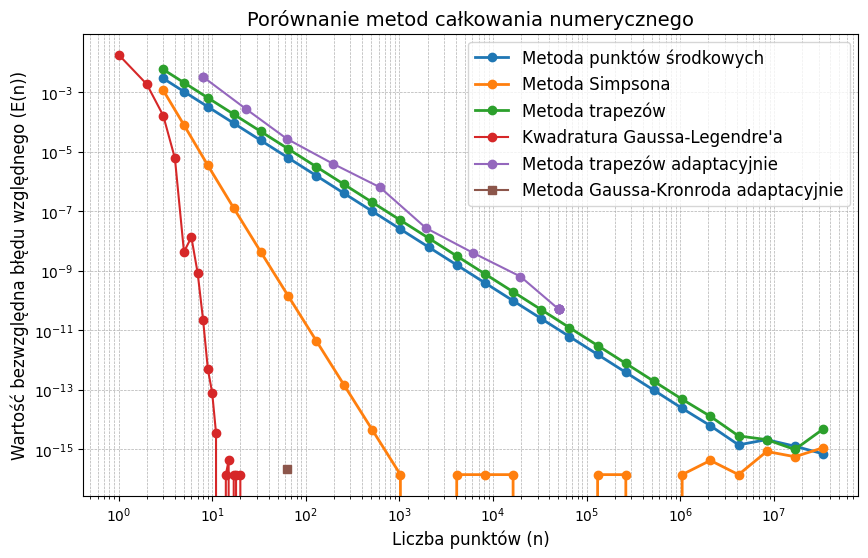

In [41]:
# skopiowany kod z poprzedniego labolatorium

import numpy as np
from scipy.integrate import trapezoid, simpson
import matplotlib.pyplot as plt

def make_points(m: int):
    """Tworzy punkty na przedziale [0,1] z 2^m + 1 węzłami."""
    return np.linspace(0, 1, 2**m + 2)

def integrate_trapz(f, x: np.array):
    """Całkuje przy użyciu metody trapezów."""
    return trapezoid(f(x), x=x)

def integrate_simps(f, x: np.array):
    """Całkuje przy użyciu metody Simpsona."""
    return simpson(f(x), x=x)

def integrate_mid_point(f, x: np.array):
    """Całkuje przy użyciu metody punktów środkowych."""
    h = (x[-1] - x[0]) / (len(x) - 1)
    midpoints = (x[:-1] + x[1:]) / 2.0
    return h * np.sum(f(midpoints))

def integrate_gauss_legendre(f, n):
    """Całkuje funkcję f na przedziale [0, 1] przy użyciu kwadratury Gaussa-Legendre'a."""
    x, w = np.polynomial.legendre.leggauss(n)
    x = 0.5 * x + 0.5  # transformacja z [-1, 1] na [0, 1]
    w = 0.5 * w        # uwzględnienie długości przedziału
    integral = np.sum(w * f(x))
    return integral

def calc_errors(f, m_array, integration_method, real_value):
    """Oblicza błąd względny dla kolejnych wartości m."""
    err_array = []
    for m in m_array:
        points = make_points(m)
        approx = integration_method(f, points)
        err_array.append(np.abs((approx - real_value) / real_value))
    return np.array(err_array)

def relative_error(f, real_value, label):
    """Rysuje wykres bezwzględnej wartości błędu względnego dla różnych wartości n."""
    n_values = np.arange(1, 21)
    errors = []
    
    for n in n_values:
        approx = integrate_gauss_legendre(f, n)
        error = np.abs((approx - real_value) / real_value)
        errors.append(error)
    
    plt.plot(n_values, errors, marker='o', label=label)

def plot_error_comparison(integration_methods, m_max=25, real_value=np.pi, f=f, plot_title='Porównanie metod całkowania numerycznego'):
    """Rysuje wykres porównujący błędy względne różnych metod całkowania."""
    m_values = np.arange(1, m_max + 1)
    # Liczba punktów dla kolejnych m: 2^m + 1
    x_values = [2**m + 1 for m in m_values]

    plt.figure(figsize=(10, 6))
    
    # Rysowanie wykresu dla każdej metody
    for label, method in integration_methods.items():
        if method == integrate_gauss_legendre:
            relative_error(f, real_value, label=label)
        else:
            errors = calc_errors(f, m_values, method, real_value)
            plt.plot(x_values, errors, lw=2, label=label, marker = 'o')
    
    plt.plot(nevals_t, errors_t, marker='o', label='Metoda trapezów adaptacyjnie')          # Rysujemy na wykresie dodatkowe metody
    plt.plot(nevals_g, errors_g, marker='s', label='Metoda Gaussa-Kronroda adaptacyjnie')
    
    plt.xscale('log')   
    plt.yscale('log')
    plt.xlabel('Liczba punktów (n)', fontsize=12)
    plt.ylabel('Wartość bezwzględna błędu względnego (E(n))', fontsize=12)
    plt.title(plot_title, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()


integration_methods = {
    "Metoda punktów środkowych": integrate_mid_point,
    "Metoda Simpsona": integrate_simps,
    "Metoda trapezów": integrate_trapz,
    "Kwadratura Gaussa-Legendre'a": integrate_gauss_legendre
}

plot_error_comparison(integration_methods)

Porównanie dla funkcji z podpunktu a)


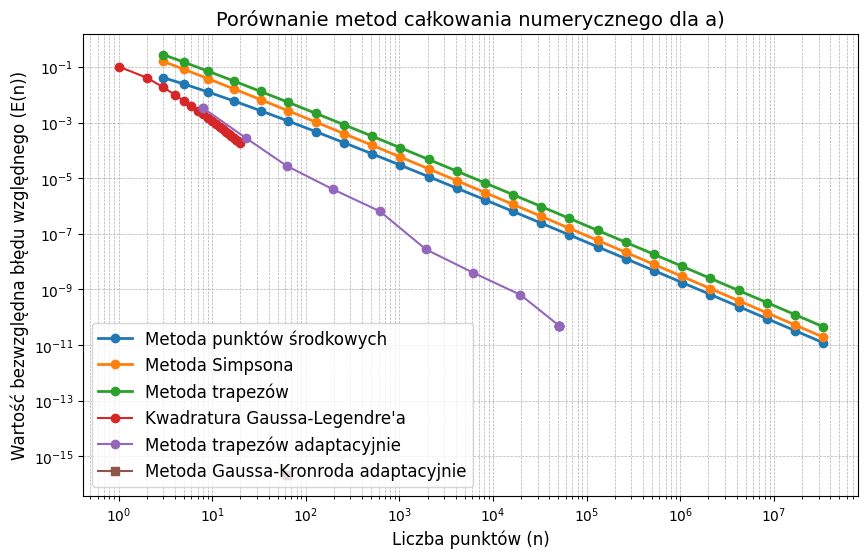

Porównanie dla funkcji z podpunktu b)


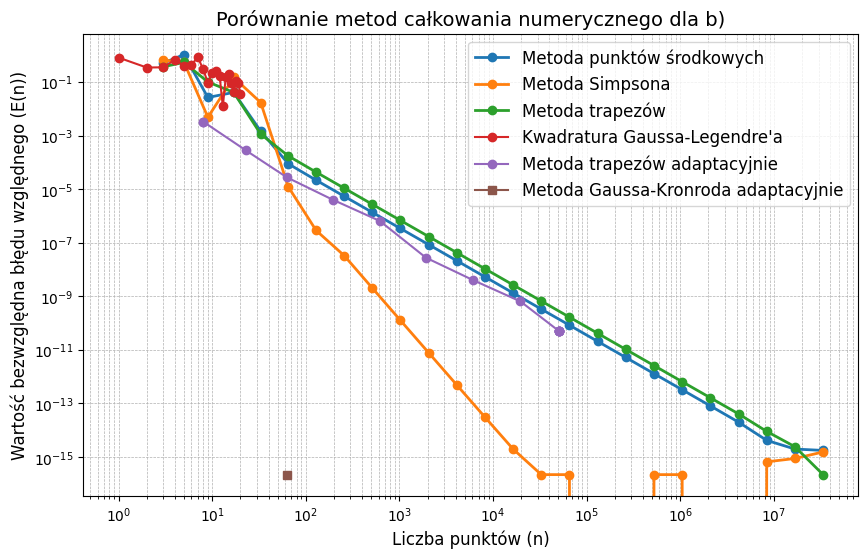

In [42]:
# Task 2 functions
from sys import float_info

g = lambda x: np.sqrt(x+float_info.min)*np.log(x+float_info.min) # Uses base e logarithm
g_real_integral = -4/9 # Real integral value of g from 0 to 1

a, b = 0.001, 0.004
h = lambda x: 1/((x-0.3)**2+a)+1/((x-0.9)**2+b)-6
# Real integral value of h from 0 to 1
h_real_integral = 1/np.sqrt(a)*(np.arctan(0.7/np.sqrt(a))+np.arctan(0.3/np.sqrt(a))) \
                + 1/np.sqrt(b)*(np.arctan(0.1/np.sqrt(b))+np.arctan(0.9/np.sqrt(b))) - 6 

print("Porównanie dla funkcji z podpunktu a)")
task1(g, g_real_integral, False)
plot_error_comparison(integration_methods, f=g, real_value=g_real_integral, plot_title='Porównanie metod całkowania numerycznego dla a)')
print("Porównanie dla funkcji z podpunktu b)")
task1(h, h_real_integral, False)
plot_error_comparison(integration_methods, f=h, real_value=h_real_integral, plot_title='Porównanie metod całkowania numerycznego dla b)')